Define Imports

In [1]:
import os
import numpy as np
from tensorflow.keras.applications import ResNet50, vgg16
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from math import sqrt

2023-08-28 07:30:55.236590: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Convolutional Neural Networks (CNNs) are essential for image similarity learning as they automatically learn  features from images. They use convolutional layers to capture local patterns, evolving into complex features as we delve deeper into the network.

While initial layers and raw pixel values seem intuitive, their high dimensionality and lack of semantic understanding make them unsuitable as feature vectors. These layers mainly capture basic features like edges and textures, which information is insufficient for comparing image similarity.

Feature extraction from images is a crucial step in image similarity tasks, as it involves converting raw pixel data into meaningful representations that capture the visual content of the images. Deep learning techniques, particularly Convolutional Neural Networks (CNNs), have proven to be highly effective at feature extraction due to their ability to automatically learn hierarchical features from images.

To tackle this challenge, pre-trained CNN models come into play. These models have been trained on extensive and diverse datasets like ImageNet, enabling them to learn and extract meaningful and discriminative features from images. A notable architecture in this category is VGG16.

In "VGG16," the number "16" corresponds to the depth of the network, indicating the presence of 16 trainable layers, encompassing convolutional, pooling, and fully connected layers. By excluding the final classification layers of the VGG16 network, we retain the capability to extract rich and high-level features.

Pre-trained VGG16 models excel at recognizing intricate patterns, shapes, and even the semantic content of objects within images. These learned features are highly valuable, especially for tasks involving image similarity. Through leveraging the learned weights in the deeper layers of the VGG16 network, we can effectively extract meaningful and robust representations of images, facilitating accurate and efficient comparisons for tasks such as identifying similar images.

In [2]:
# Load pre-trained ResNet50 model (excluding classification layers)
model = vgg16.VGG16(weights='imagenet', include_top=False, pooling='avg')

2023-08-28 07:30:58.390874: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
def extract_features(img_path): 
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    img_features = model.predict(img)
    img_features = np.squeeze(img_features)
                    
    return list(img_features)

Decide on a similarity metric to compare the feature vectors of two images. Common metrics include Euclidean distance, cosine similarity, or a custom distance function.

When selecting a similarity metric for comparing feature vectors of images, common options include Euclidean distance, cosine similarity, or a customized distance function. The chosen metric should accurately capture perceptual likeness in line with human judgment and the specific task.

Cosine similarity measures the cosine of the angle between two vectors. It's particularly valuable when focusing on orientation rather than vector magnitude. 

In [4]:
def cosineSim(a1,a2):
    sum = 0
    suma1 = 0
    sumb1 = 0
    for i,j in zip(a1, a2):
        suma1 += i * i
        sumb1 += j*j
        sum += i*j
    cosine_sim = sum / ((sqrt(suma1))*(sqrt(sumb1)))
    return cosine_sim

In [5]:
img_1_path = "img/img/MEN/Denim/id_00000080/01_1_front.jpg"
img_2_path = "img/img/MEN/Denim/id_00000080/01_7_additional.jpg"
img_3_path = "img/img/WOMEN/Jackets_Coats/id_00000054/01_3_back.jpg"
img_4_path = "img/img/MEN/Shorts/id_00001246/01_2_side.jpg"

In [6]:
img_1 = image.load_img(img_1_path, target_size = (224,224))
img_2 = image.load_img(img_2_path, target_size = (224,224))
img_3 = image.load_img(img_3_path, target_size = (224,224))
img_4 = image.load_img(img_4_path, target_size = (224,224))

In [7]:
img_1_features = extract_features(img_1_path)
img_2_features = extract_features(img_2_path)
img_3_features = extract_features(img_3_path)
img_4_features = extract_features(img_4_path)

1/1 [==============================] - 0s 212ms/step


Probability of below shown images being equal is  0.796727.


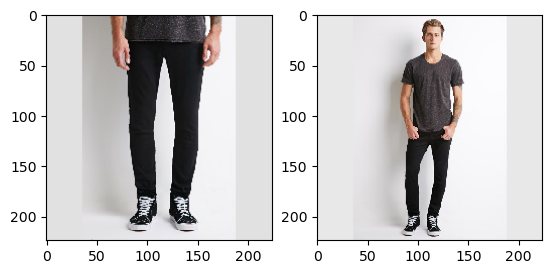

In [9]:
similarity = cosineSim(img_1_features, img_2_features)
print("Probability of below shown images being equal is  %f."%similarity )
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_1)
plt.subplot(1,2,2)
plt.imshow(img_2)

Probability of below shown images being equal is  0.650548.


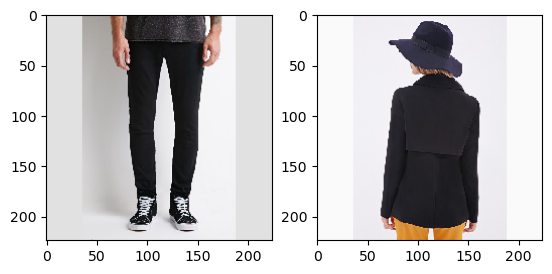

In [11]:
similarity = cosineSim(img_1_features, img_3_features)
print("Probability of below shown images being equal is  %f."%similarity )
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_1)
plt.subplot(1,2,2)
plt.imshow(img_3)

Probability of below shown images being equal is  0.604668.


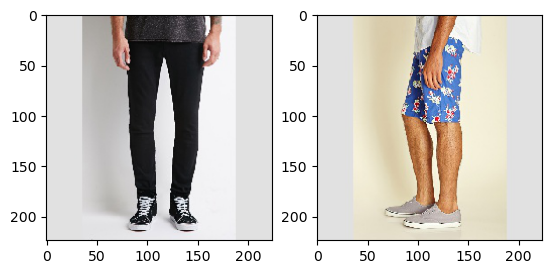

In [12]:
similarity = cosineSim(img_1_features, img_4_features)
print("Probability of below shown images being equal is  %f."%similarity )
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_1)
plt.subplot(1,2,2)
plt.imshow(img_4)

In scenarios where the existing pre-trained model does not effectively optimize the retrieval of similar images with a satisfactory level of confidence, an alternative approach involves creating a custom Convolutional Neural Network (CNN) encoder. This encoder would be designed to extract distinctive features from the images, potentially leading to improved similarity results. However, due to the current time constraints associated with the assignment, I have opted to proceed with the pre-trained model for feature extraction and image retrieval.